In [1]:
import os, sys, pathlib

PROJECT_ROOT = pathlib.Path("..").resolve()
os.chdir(PROJECT_ROOT)
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

from train.train_baseline_lstm import main as lstm_single_main

train_m, val_m, val_rmse, val_mae, val_mape = lstm_single_main()


Using device: cuda
Train samples: 6625
Val   samples: 1153
BaselineLSTM(
  (lstm): LSTM(5, 64, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=64, out_features=288, bias=True)
)
[Epoch 01] Train MSE=0.3892 | Val MSE=0.2360, Val RMSE=6440.97 kW, Val MAE=5146.79 kW, Val MAPE=4.60%, LR=5.0e-04
  -> New best model saved to checkpoints\baseline_lstm_single_best.pt
[Epoch 02] Train MSE=0.2021 | Val MSE=0.2015, Val RMSE=5951.64 kW, Val MAE=4699.12 kW, Val MAPE=4.21%, LR=5.0e-04
  -> New best model saved to checkpoints\baseline_lstm_single_best.pt
[Epoch 03] Train MSE=0.1863 | Val MSE=0.2176, Val RMSE=6185.63 kW, Val MAE=4913.64 kW, Val MAPE=4.40%, LR=5.0e-04
[Epoch 04] Train MSE=0.1725 | Val MSE=0.2220, Val RMSE=6247.97 kW, Val MAE=4934.89 kW, Val MAPE=4.42%, LR=5.0e-04
[Epoch 05] Train MSE=0.1641 | Val MSE=0.2342, Val RMSE=6417.51 kW, Val MAE=5088.24 kW, Val MAPE=4.56%, LR=5.0e-04
[Epoch 06] Train MSE=0.1543 | Val MSE=0.2392, Val RMSE=6485.32 kW, Val MAE=5225.75 kW, V

AcceleratorError: CUDA error: unknown error
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


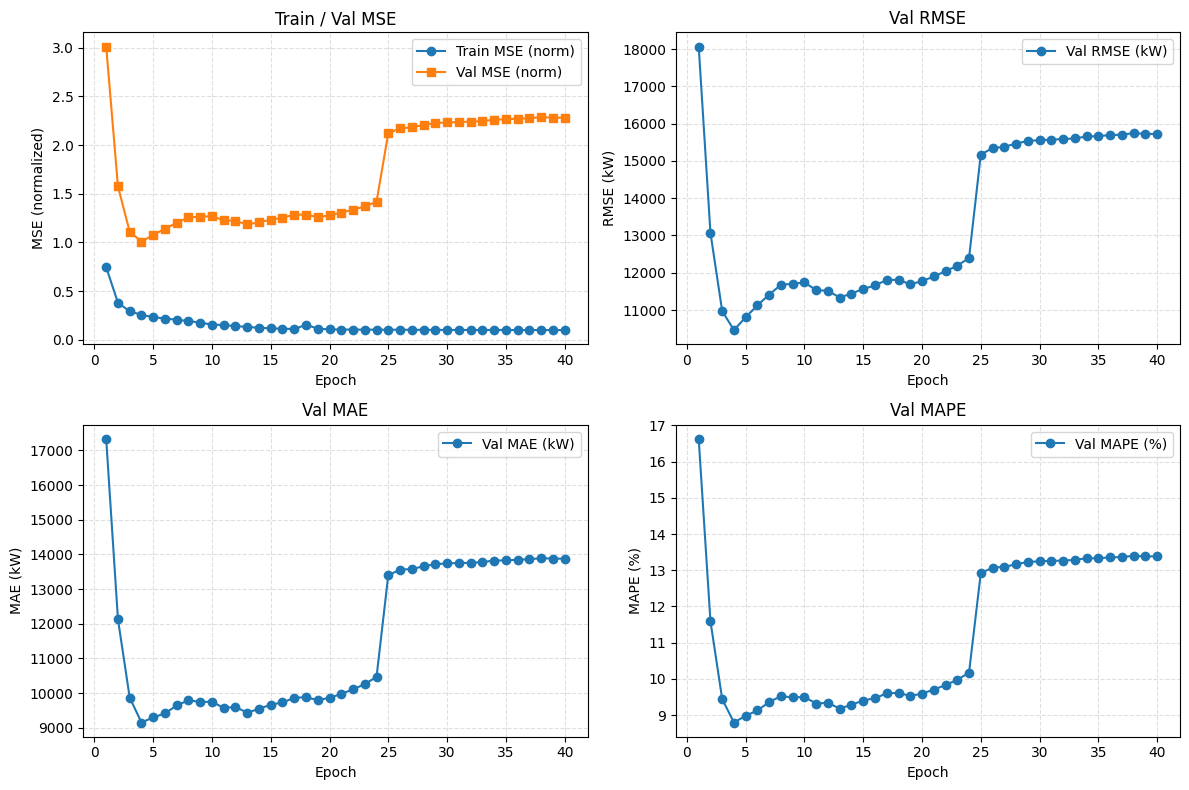

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 假设已经有：
# train_m, val_m, val_rmse, val_mae, val_mape = lstm_single_main()

epochs = np.arange(1, len(train_m) + 1)

plt.figure(figsize=(12, 8))

# ---- 子图1：标准化 MSE ----
plt.subplot(2, 2, 1)
plt.plot(epochs, train_m, "o-", label="Train MSE (norm)")
plt.plot(epochs, val_m, "s-", label="Val MSE (norm)")
plt.xlabel("Epoch")
plt.ylabel("MSE (normalized)")
plt.title("Train / Val MSE")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()

# ---- 子图2：RMSE (kW) ----
plt.subplot(2, 2, 2)
plt.plot(epochs, val_rmse, "o-", label="Val RMSE (kW)")
plt.xlabel("Epoch")
plt.ylabel("RMSE (kW)")
plt.title("Val RMSE")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()

# ---- 子图3：MAE (kW) ----
plt.subplot(2, 2, 3)
plt.plot(epochs, val_mae, "o-", label="Val MAE (kW)")
plt.xlabel("Epoch")
plt.ylabel("MAE (kW)")
plt.title("Val MAE")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()

# ---- 子图4：MAPE (%) ----
plt.subplot(2, 2, 4)
plt.plot(epochs, np.array(val_mape) * 100, "o-", label="Val MAPE (%)")
plt.xlabel("Epoch")
plt.ylabel("MAPE (%)")
plt.title("Val MAPE")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()
